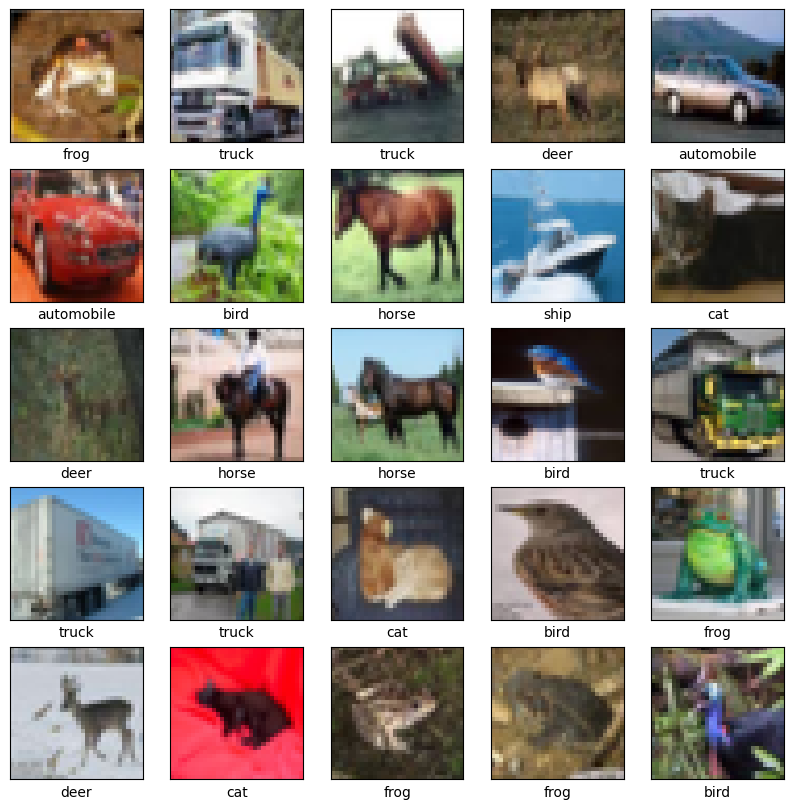

Epoch 1/10
1563/1563 [==============================] - 67s 42ms/step - loss: 1.5501 - accuracy: 0.4344 - val_loss: 1.2543 - val_accuracy: 0.5470
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1832 - accuracy: 0.5800 - val_loss: 1.1034 - val_accuracy: 0.6116
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0315 - accuracy: 0.6379 - val_loss: 1.0063 - val_accuracy: 0.6433
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9253 - accuracy: 0.6766 - val_loss: 0.9415 - val_accuracy: 0.6724
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8541 - accuracy: 0.6989 - val_loss: 0.9551 - val_accuracy: 0.6668
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8016 - accuracy: 0.7190 - val_loss: 0.8977 - val_accuracy: 0.6870
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7476 - accuracy: 0.7371 - val_loss: 0.8757 -

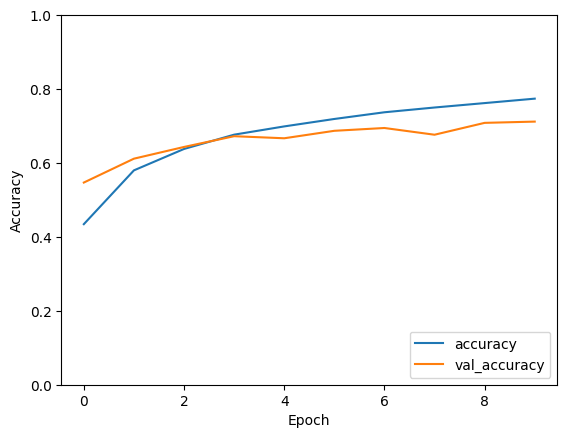

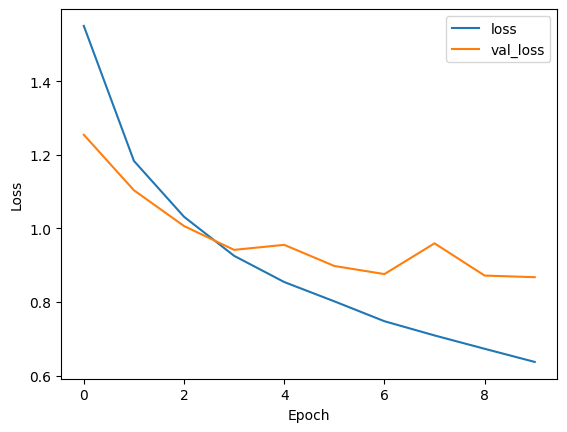

In [ ]:
# Importing necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display some sample images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Plot training and validation accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
